In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Data loading

In [2]:
data = load_digits()

In [3]:
X = data.data
y = data.target

In [4]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [5]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

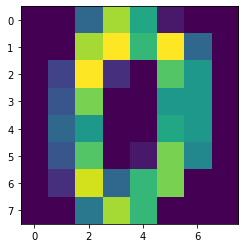

In [7]:
plt.imshow(X[0].reshape(8, 8))

In [8]:
y[0]

0

# Training

In [9]:
cv = 10

In [10]:
def write_answer(data, filename):
    with open(f"output/random_forest/{filename}.txt", "w") as f:
        if type(data)==list:
            f.write(" ".join(str(i) for i in data))
        else:
            f.write(str(data))

## DecisionTreeClassifier

In [11]:
score = cross_val_score(DecisionTreeClassifier(), X, y, cv=cv)
score_mean = score.mean()
print(score_mean)
write_answer(score_mean, 1)

0.8235785226567349


## BaggingClassifier

In [12]:
score = cross_val_score(BaggingClassifier(DecisionTreeClassifier(), n_estimators=100), X, y, cv=cv, n_jobs=-1)
score_mean = score.mean()
print(score_mean)
write_answer(score_mean, 2)

0.9231688392302917


## BaggingClassifier (partial features)

In [13]:
score = cross_val_score(BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_features=int(np.sqrt(X.shape[1]))), X, y, cv=cv, n_jobs=-1)
score_mean = score.mean()
print(score_mean)
write_answer(score_mean, 3)

0.9365642458100558


## BaggingClassifier (partial features in estimators)

In [14]:
score = cross_val_score(BaggingClassifier(DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1]))), n_estimators=100), X, y, cv=cv, n_jobs=-1)
score_mean = score.mean()
print(score_mean)
write_answer(score_mean, 4)

0.9499193047796399


## RandomForestClassifier

In [15]:
answers = []

In [16]:
score = cross_val_score(RandomForestClassifier(), X, y, cv=cv, n_jobs=-1)
score_mean = score.mean()
print(score_mean)

0.9515797641216635


### Overfits with big number of trees (false)

In [17]:
number_of_trees = range(50, 500, 30)
scores = []

In [18]:
for n_trees in tqdm(number_of_trees):
    score = cross_val_score(RandomForestClassifier(n_estimators=n_trees), X, y, cv=cv, n_jobs=-1)
    score_mean = score.mean()
    scores.append(score_mean)

100%|██████████| 15/15 [00:37<00:00,  2.49s/it]


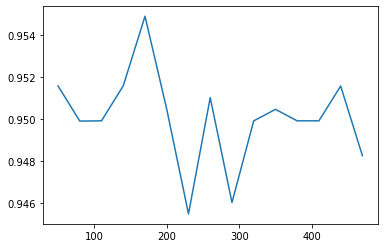

In [19]:
sns.lineplot(x=number_of_trees, y=scores)
plt.show()

### Works worse with small number of trees (true)

In [20]:
number_of_trees = range(5, 100, 10)
scores = []

In [21]:
for n_trees in tqdm(number_of_trees):
    score = cross_val_score(RandomForestClassifier(n_estimators=n_trees), X, y, cv=cv, n_jobs=-1)
    score_mean = score.mean()
    scores.append(score_mean)

100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


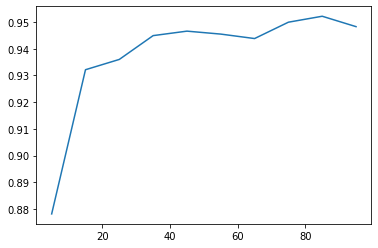

In [22]:
sns.lineplot(x=number_of_trees, y=scores)
plt.show()

In [23]:
answers.append(2)

### With growing number of trees quality stops at some number (true)

In [24]:
answers.append(3)

### If more features then algo is worse (true)

In [25]:
number_of_max_features = range(5, 60, 5)
scores = []

In [26]:
for n_features in tqdm(number_of_max_features):
    score = cross_val_score(RandomForestClassifier(max_features=n_features), X, y, cv=cv, n_jobs=-1)
    score_mean = score.mean()
    scores.append(score_mean)

100%|██████████| 11/11 [00:21<00:00,  1.99s/it]


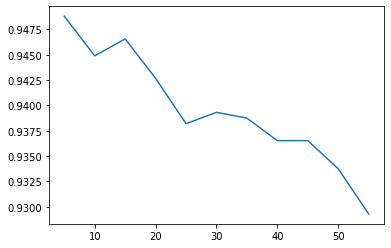

In [27]:
sns.lineplot(x=number_of_max_features, y=scores)
plt.show()

In [28]:
answers.append(4)

### If more features then algo is better (false)

### If small depth then algo is better (false)

In [29]:
depths = range(5, 150, 10)
scores = []

In [30]:
for depth in tqdm(depths):
    score = cross_val_score(RandomForestClassifier(max_depth=depth), X, y, cv=cv, n_jobs=-1)
    score_mean = score.mean()
    scores.append(score_mean)

100%|██████████| 15/15 [00:13<00:00,  1.10it/s]


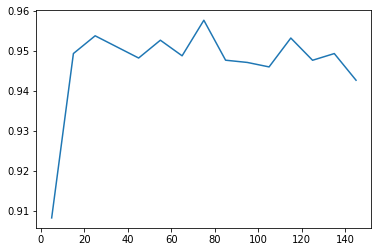

In [31]:
sns.lineplot(x=depths, y=scores)
plt.show()

### If small depth then algo is worse (true)

In [32]:
answers.append(7)

In [33]:
write_answer(answers, 5)